In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, jaccard_score,log_loss
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('C:\\Users\\srika\\OneDrive\\Desktop\\New folder\\dataset.csv')

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.shape

(614, 13)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
def Gender(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 2
def Married(x):
    if x=='Yes':
        return 0
    if x=='No':
        return 1
def Self_Employed(x):
    if x=='Yes':
        return 0
    if x=='No':
        return 1
def Education(x):
    if x=='Graduate':
        return 0
    if x=='Not Graduate':
        return 1
def Dependents(x):
    if x=='3+':
        return 3
    elif x=='1':
        return 1
    else:
        return 2
def Property_Area(x):
    if x=='Urban':
        return 0
    if x=='Semiurban':
        return 1
    if x=='Rural':
        return 2
def Loan_Status(x): 
    if x=='Y':
        return 0
    if x=='N':
        return 1
    

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender']=df['Gender'].apply(Gender)
df['Married']=df['Married'].apply(Married)
df['Education']=df['Education'].apply(Education)
df['Self_Employed']=df['Self_Employed'].apply(Self_Employed)
df['Dependents']=df['Dependents'].apply(Dependents)
df['Property_Area']=df['Property_Area'].apply(Property_Area)
df['Loan_Status']=df['Loan_Status'].apply(Loan_Status)

In [10]:
import math
med=math.floor(df.Gender.median())
med4=math.floor(df.Married.median())
med1=math.floor(df.Self_Employed.median())
med2=math.floor(df.Credit_History.median())
mea=math.floor(df.LoanAmount.mean())
mea1=math.floor(df.Loan_Amount_Term.mean())
med3=math.floor(df.Loan_Status.median())
df.Married=df.Married.fillna(med)
df.Loan_Status=df.Loan_Status.fillna(med)
df.Gender=df.Gender.fillna(med)
df.Self_Employed=df.Self_Employed.fillna(med1)
df.LoanAmount=df.LoanAmount.fillna(mea)
df.Loan_Amount_Term =df.Loan_Amount_Term .fillna(mea1)
df.Credit_History =df.Credit_History .fillna(med2)

In [11]:
 x=df.drop(['Loan_Status','Loan_ID'],axis='columns')
y = df.Loan_Status

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,1.0,2,0,1.0,5849,0.0,146.0,360.0,1.0,0,0
1,LP001003,1.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,2,1
2,LP001005,1.0,0.0,2,0,0.0,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,1.0,0.0,2,1,1.0,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,1.0,1.0,2,0,1.0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2.0,1.0,2,0,1.0,2900,0.0,71.0,360.0,1.0,2,0
610,LP002979,1.0,0.0,3,0,1.0,4106,0.0,40.0,180.0,1.0,2,0
611,LP002983,1.0,0.0,1,0,1.0,8072,240.0,253.0,360.0,1.0,0,0
612,LP002984,1.0,0.0,2,0,1.0,7583,0.0,187.0,360.0,1.0,0,0


In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20,random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred= model.predict(x_test)

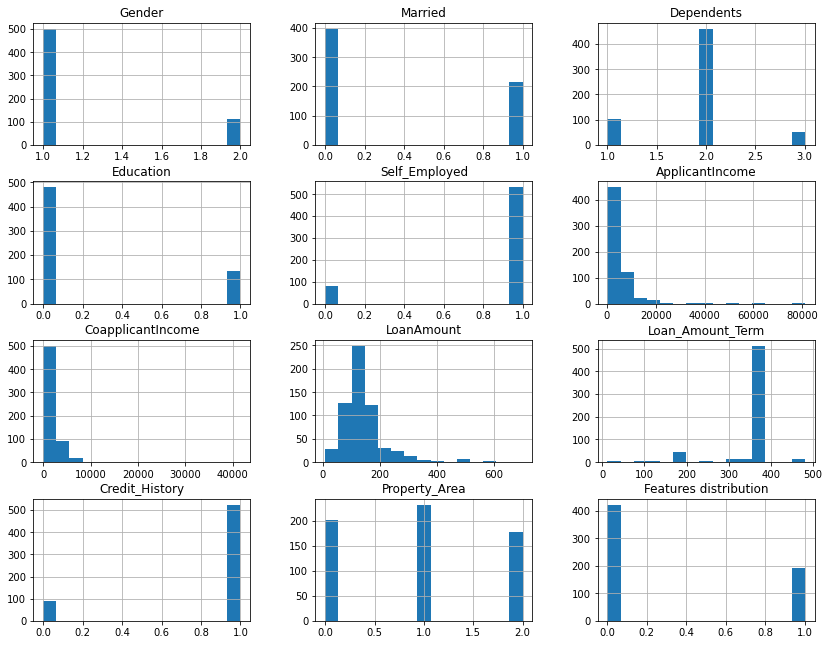

In [18]:
df.hist(figsize = (14,11), bins = 15)
plt.title('Features distribution')
plt.show()

<AxesSubplot:>

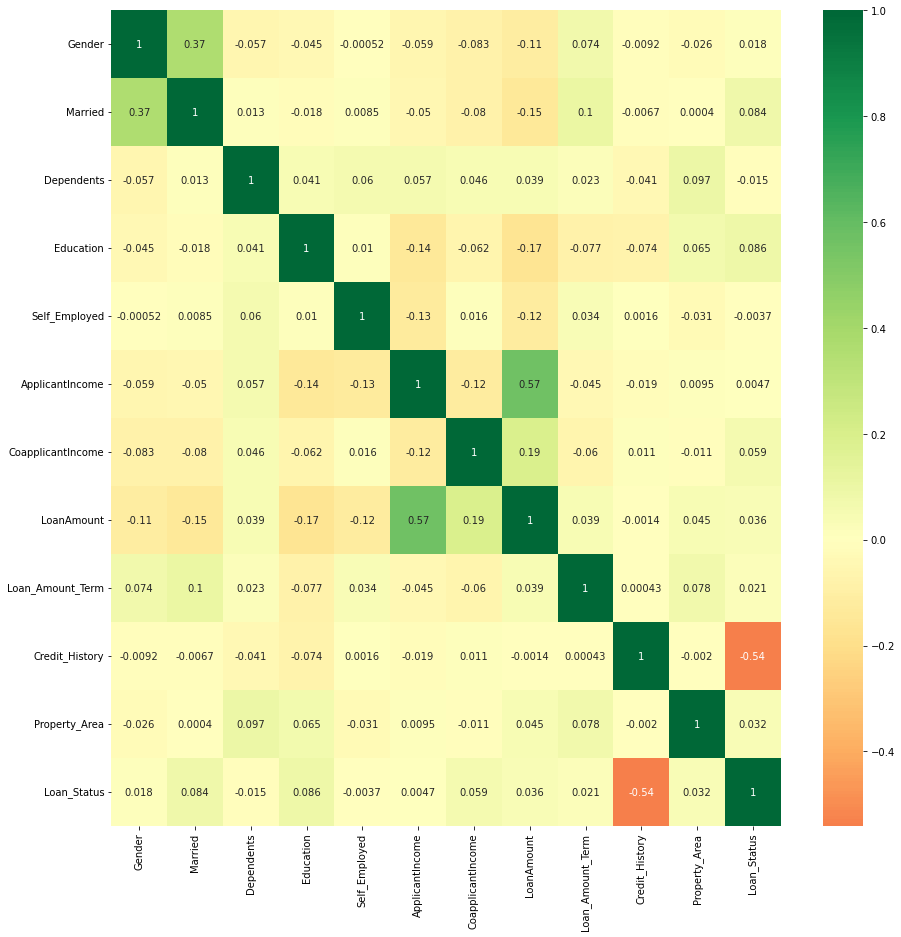

In [19]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', center = 0)

C:\Users\srika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


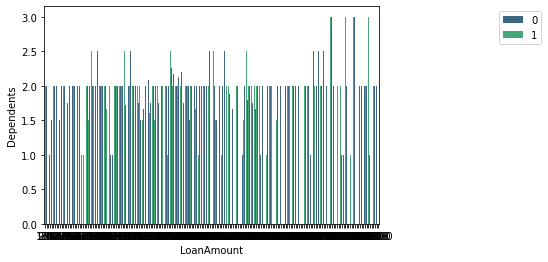

In [20]:
sns.barplot('LoanAmount','Dependents',hue='Loan_Status',data=df,palette='viridis',ci=None)
plt.legend(bbox_to_anchor=(1.5,1))

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\srika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


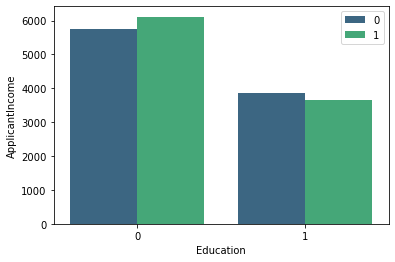

In [22]:
sns.barplot('Education','ApplicantIncome',hue='Loan_Status',data=df,palette='viridis',ci=None)
plt.legend(bbox_to_anchor=(1.0,1))

In [23]:
model.predict([[0,1,3,1,2,1,1,8500,123,0,1]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [24]:
model.predict([[1,0,1,1,2,1,1,85,123,1,0]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [25]:
from sklearn.metrics import r2_score
r2_score (y_test, y_pred)

0.17171717171717182

# LINEAR REGRESSION


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model1=LinearRegression()

In [28]:
model1.fit(x_train,y_train)

LinearRegression()

In [29]:
model1.coef_

array([-1.65611910e-02,  7.03276923e-02, -4.74019422e-02,  7.45037017e-02,
        1.66468163e-02, -1.71018496e-06,  1.17968255e-05,  2.88315708e-04,
        1.93286449e-04, -7.08402807e-01,  2.29786961e-02])

In [30]:
model1.intercept_

0.843105117393441

In [31]:
y_pred = model1.predict(x_test)

In [32]:
model.predict([[0,1,23,1,2,1,1,8500,123,1,0]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [33]:
model.predict([[0,1,2,1,1,0,0,800,185,0,1]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)





# DECISION TREE




In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model2 = DecisionTreeClassifier(criterion = 'entropy')

In [36]:
model2.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [37]:
predictions= model2.predict(x_test)

C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

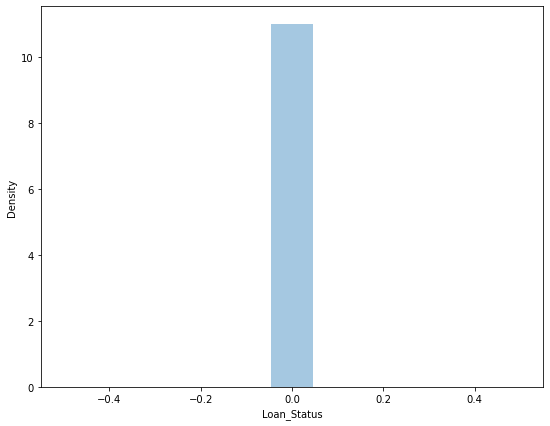

In [38]:
plt.figure(figsize=(9,7))
sns.distplot(y_test-predictions)

In [39]:
model2.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [40]:
model2.predict([[1,0,3,0,2,1,1,0,180,2,1]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [41]:
model2.predict([[1,0,1,1,2,1,1,85,123,1,0]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [42]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

[[90  0]
 [ 0 33]]


Text(33.0, 0.5, 'True')

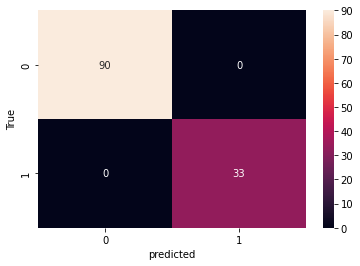

In [43]:
y_pred = model2.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot = True, fmt="d")
plt.xlabel('predicted')
plt.ylabel('True')

In [44]:
js=jaccard_score(y_test, y_pred, average='binary')
print('jaccard_score', js)

jaccard_score 1.0


In [45]:
y_pred2 = model2.predict_proba(x_test)
ll = log_loss(y_test, y_pred2)
print('log_loss', ll)

log_loss 9.992007221626413e-16



# RANDOM FOREST CLASSIFIER

In [46]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
model3.predict([[1,0,1,2,2,1,0,85,1230,1,0]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [48]:
model3.predict([[1,0,3,0,2,1,1,0,180,2,1]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [49]:
import pickle
p = model.predict(x)


pickle.dump(model,open('rf.pkl','wb'))
model=pickle.load(open('rf.pkl','rb'))

In [50]:
model3.predict([[1,0,3,0,2,1,1,0,180,2,1]])

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [53]:
model3.score(x_test,y_test)

0.8211382113821138